# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

Bo Coleman

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

In [10]:
np.random.normal([1, 2], [2, 0.01])

array([1.05796992, 2.00405881])

# Neural Networks - Image Recognition 

In [6]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [12]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [17]:
x_train.shape

(60000, 784)

Before running the model, here is an example of what the noise will look like (this is confirmation each image will get it's own unique amount of noise)

In [61]:
x_train_new = x_train + np.random.normal(scale = 0.5, size=x_train.shape)

Inspect the first 5 pixels of the first 5 images:

In [64]:
for image_num in range(5):
    print('Here is image number ' + str(image_num + 1) + ' without noise')
    print(x_train[image_num, :5])
    print('Here is image number ' + str(image_num + 1) + ' with noise')
    print(x_train_new[image_num, :5])

Here is image number 1 without noise
[0. 0. 0. 0. 0.]
Here is image number 1 with noise
[-0.63253032  0.06594516  0.07467569  0.45863424 -0.2230083 ]
Here is image number 2 without noise
[0. 0. 0. 0. 0.]
Here is image number 2 with noise
[ 0.40462212  1.03932422  0.70531609  0.02309339 -0.63023883]
Here is image number 3 without noise
[0. 0. 0. 0. 0.]
Here is image number 3 with noise
[ 0.39054925 -0.55922951 -0.41940463 -0.95465995  0.18317708]
Here is image number 4 without noise
[0. 0. 0. 0. 0.]
Here is image number 4 with noise
[ 0.32141281  0.34156669 -0.30452076  0.11304963  0.71996049]
Here is image number 5 without noise
[0. 0. 0. 0. 0.]
Here is image number 5 with noise
[-0.99003327  0.91702262 -0.15371132  0.18430228  0.27856797]


Run a NN for each scale value:

In [42]:
scales_to_test = [.1, .5, 1.0, 2.0, 4.0]
train_accuracies = []
test_accuracies = []

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

for scale in scales_to_test:
    # add some random noise to both x_train and x_test
    x_train_new = x_train + np.random.normal(scale = scale, size=x_train.shape)
    x_test_new = x_test + np.random.normal(scale = scale, size=x_test.shape)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train_new, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_new, y_test))
    score = model.evaluate(x_test_new, y_test, verbose=0)
    
    train_accuracies.append(history.history['accuracy'][-1])
    test_accuracies.append(score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0941 - accuracy: 0.6294 - val_loss: 0.7845 - val_accuracy: 0.7360
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6767 - accuracy: 0.7725 - val_loss: 0.7041 - val

 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 2.4072 - accuracy: 0.1577 - val_loss: 2.1476 - val_accuracy: 0.2194
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0859 - accuracy: 0.2514 - val_loss: 2.1339 - val_accuracy: 0.2265
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.9513 - accuracy: 0.3048 - val_loss: 2.1484 - val_accuracy: 0.2309
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.8279 - accuracy: 0.3532 - val_loss: 2.2007 - val_accuracy: 0.2250
Epoch 5/20
469/469 [======

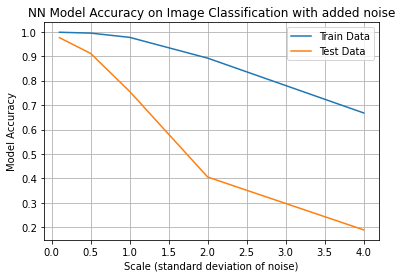

In [48]:
# graph of Train and Test Accuracies for each scale (of noise)
plt.figure()
plt.plot(scales_to_test, train_accuracies, label = 'Train Data')
plt.plot(scales_to_test, test_accuracies, label = 'Test Data')
plt.xlabel('Scale (standard deviation of noise)')
plt.ylabel('Model Accuracy')
plt.title('NN Model Accuracy on Image Classification with added noise')
plt.grid(True)
plt.legend()
plt.show()

The higher the value of scale in the np.random.normal() function, the more noise, and subsequently, the worse the performance of the NN on Image Classification.  Comparing the NN without noisy data and with scale = 0.1:

In [54]:
# model without noise
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
train_accuracy_no_noise = history.history['accuracy'][-1]
test_accuracy_no_noise = score[1]

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

In [65]:
print('The train accuracy without noise is: ' + str(round(train_accuracy_no_noise, 4)))
print('The train accuracy with noise (scale = 0.1) is: ' + str(round(train_accuracies[0], 4)))
print('The test accuracy without noise is: ' + str(round(test_accuracy_no_noise, 4)))
print('The test accuracy with noise (scale = 0.1) is: ' + str(round(test_accuracies[0], 4)))

The train accuracy without noise is: 0.9949
The train accuracy with noise (scale = 0.1) is: 0.9979
The test accuracy without noise is: 0.9835
The test accuracy with noise (scale = 0.1) is: 0.9758
